In [1]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importing dataset using pandas
import pandas as pd

# to do numerical operations
import numpy as np

# importing seaborn to view the plots to check the outliers
import seaborn as sns

# importing library to create 2D graphs and plots
import matplotlib.pyplot as plt

In [3]:
# to read the CSV file (assuming it's named 'Financial_dataset.csv' after extraction)
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fraud Detection Project/Financial_dataset.csv')

# to display the first few rows of the DataFrame
data.head()

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0

In [4]:
# To know the information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


**Insights**
* The dataset consist of **11 columns**.
* We have **5 columns** of float datatype.
* We have **3 columns** of integer datatype.
* We have **3 columns** of object datatype.
* The dataset contains **6362620** rows of data.

## Data Separation

In [5]:
# function for separating the dataset
def train_data_stream_split(data, train_percent=0.8, seed=42):
    # to set random seed for reproducibility
    np.random.seed(seed)

    # to randomly permute the data indices
    perm = np.random.permutation(data.index)

    # to determine the split point based on the train_percent
    m = len(data.index)
    train_end = int(train_percent * m)

    # to create the training and streaming datasets
    train = data.iloc[perm[:train_end]]
    data_stream = data.iloc[perm[train_end:]]

    return train, data_stream

In [6]:
# separating the dataset using the defined function
data, data_stream = train_data_stream_split(data)
data

step      type      amount     nameOrig  oldbalanceOrg  \
3737323   278   CASH_IN   330218.42   C632336343       20866.00   
264914     15   PAYMENT    11647.08  C1264712553       30370.00   
85647      10   CASH_IN   152264.21  C1746846248      106589.00   
5899326   403  TRANSFER  1551760.63   C333676753           0.00   
2544263   206   CASH_IN    78172.30   C813403091     2921331.58   
...       ...       ...         ...          ...            ...   
2477525   204  CASH_OUT   288169.87  C1009894966           0.00   
3138333   236   CASH_IN    20607.42  C1249252276    14772508.56   
3273028   251  CASH_OUT   328894.20   C290813598           0.00   
3885974   283   PAYMENT     9358.65  C1228810060        5010.00   
5981498   408   PAYMENT     5936.57   C564899385       49194.00   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
3737323       351084.42   C834976624       452419.57       122201.15        0   
264914         18722.92   M215391829            0.00            0.00        0   
85647         258853.21  C1607284477       201303.01        49038.80        0   
5899326            0.00  C1564353608      3198359.45      4750120.08        0   
2544263      2999503.88  C1091768874       415821.90       337649.60        0   
...                 ...          ...             ...             ...      ...   
2477525            0.00  C2107212281       546006.39       834176.26        0   
3138333     14793115.99   C259960007       104082.46        83475.03        0   
3273028            0.00   C951233019      1393020.58      1721914.78        0   
3885974            0.00   M222748122            0.00            0.00        0   
5981498        43257.43   M399870180            0.00            0.00        0   

         isFlaggedFraud  
3737323               0  
264914                0  
85647                 0  
5899326               0  
2544263               0  
...                 ...  
2477525               0  
3138333               0  
3273028               0  
3885974               0  
5981498               0  

[5090096 rows x 11 columns]

In [7]:
# To view shape of the separated datasets
print('Dimensions of the training dataset',data.shape)
print('Dimensions of the streaming dataset',data_stream.shape)

Dimensions of the training dataset (5090096, 11)
Dimensions of the streaming dataset (1272524, 11)


## Data Preparation

In [8]:
# to know the column names for renaming purpose
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [9]:
# renaming the columns for better understanding
data = data.rename(columns = {'nameOrig' : 'origin', 'oldbalanceOrg' : 'sender_old_balance',
                              'newbalanceOrig': 'sender_new_balance', 'nameDest' : 'destination',
                              'oldbalanceDest' : 'receiver_old_balance', 'newbalanceDest': 'receiver_new_balance',
                              'isFraud' : 'isfraud'})

In [10]:
# checking for duplicates
len(data[data.duplicated()])

0

In [11]:
# checking the null values in the dataset
data.isnull().sum()

step                    0
type                    0
amount                  0
origin                  0
sender_old_balance      0
sender_new_balance      0
destination             0
receiver_old_balance    0
receiver_new_balance    0
isfraud                 0
isFlaggedFraud          0
dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

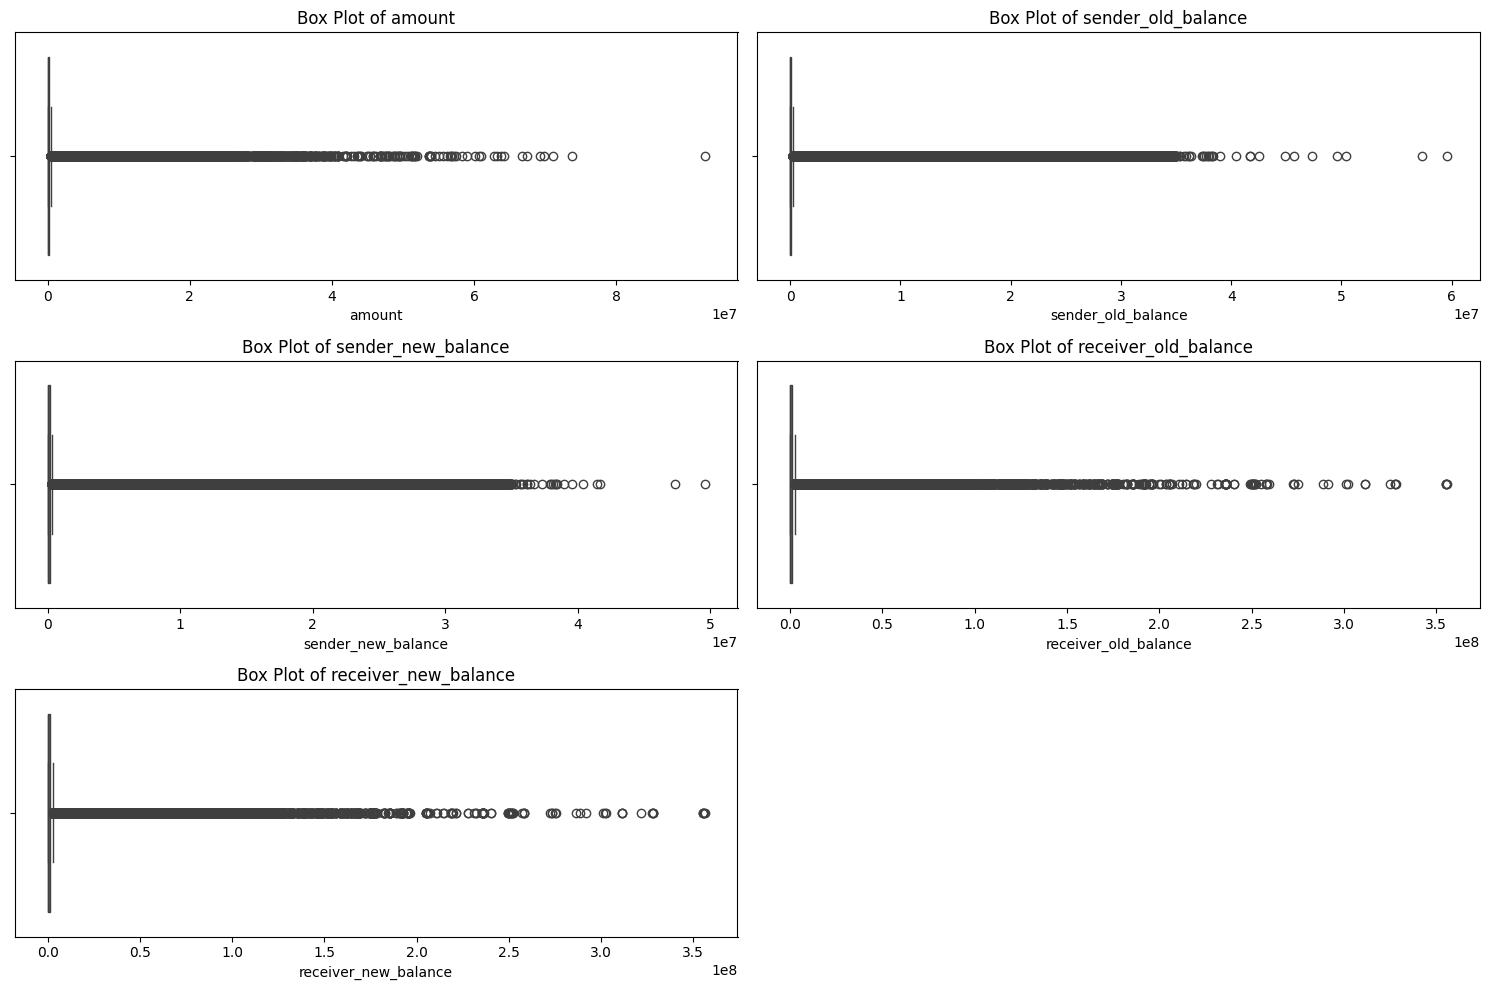

In [12]:
# detecting and removing the outlier

# to list of numeric columns for box plots
numeric_columns = ['amount', 'sender_old_balance', 'sender_new_balance', 'receiver_old_balance', 'receiver_new_balance']

# to set the figure size for better visualization
plt.figure(figsize=(15, 10))

# to create subplots for each numeric column
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)  # 3 rows and 2 columns for subplots
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()  # to adjust subplots to fit into the figure area
plt.show()

In [13]:
# to know the dominant class in "isFlaggedFraud"
data.isFlaggedFraud.value_counts()

isFlaggedFraud
0    5090081
1         15
Name: count, dtype: int64

In [14]:
# to know the dominant class in "isfraud"
data.isfraud.value_counts()

isfraud
0    5083486
1       6610
Name: count, dtype: int64

In [15]:
# repositioning the column 'destination' and
cols = data.columns.tolist()
new_position = 4

cols.insert(new_position, cols.pop(cols.index('destination')))
data = data[cols]

data = data.drop(columns = ['isFlaggedFraud'], axis = 'columns')

In [16]:
# to know which 'destination' have the highest number of fraudulent transactions

pd.crosstab(index=data.destination, columns=data.isfraud).reset_index().sort_values(by=[1], ascending=False).head(10)

isfraud  destination   0  1
189084   C1669818195   2  2
130378   C1460854172   9  2
518939    C904300960  25  2
3819     C1013511446  28  2
233797   C1827800010   1  2
113047   C1399829166  18  2
535704    C964377943   2  2
406118    C505532836   3  2
185053   C1655359478  24  2
42025    C1148781766   0  2

In [17]:
# to know which 'origins' have the highest number of fraudulent transactions

pd.crosstab(index=data.origin, columns=data.isfraud).reset_index().sort_values(by=[1], ascending=False).head(10)

isfraud       origin  0  1
144415   C1055011986  0  1
4335668   C715754415  0  1
2590942  C1985220781  0  1
1020963  C1388535947  0  1
530454   C1201856349  0  1
2197928  C1835922143  0  1
1076342  C1409640196  0  1
1558868  C1593088347  0  1
1341382   C151033820  0  1
1654326  C1629313873  0  1

In [18]:
# to make a copy of original data
data1 = data.copy()

# to initialize the 'type2' column with NaN and cast it to 'object' to avoid dtype issues
data1['type2'] = np.nan
data1['type2'] = data1['type2'].astype('object')

# Set 'type2' based on the conditions
data1.loc[data.origin.str.contains('C') & data1.destination.str.contains('C'), 'type2'] = 'CC'
data1.loc[data.origin.str.contains('C') & data1.destination.str.contains('M'), 'type2'] = 'CM'
data1.loc[data.origin.str.contains('M') & data1.destination.str.contains('C'), 'type2'] = 'MC'
data1.loc[data.origin.str.contains('M') & data1.destination.str.contains('M'), 'type2'] = 'MM'

# to reorder columns to move 'type2' to a new position
cols = data1.columns.tolist()
new_position = 2
cols.insert(new_position, cols.pop(cols.index('type2')))
data1 = data1[cols]

# to drop 'origin' and 'destination' columns
data1.drop(columns=['origin', 'destination'], axis='columns', inplace=True)

In [19]:
# to view the modified dataset
data1

step      type type2      amount  sender_old_balance  \
3737323   278   CASH_IN    CC   330218.42            20866.00   
264914     15   PAYMENT    CM    11647.08            30370.00   
85647      10   CASH_IN    CC   152264.21           106589.00   
5899326   403  TRANSFER    CC  1551760.63                0.00   
2544263   206   CASH_IN    CC    78172.30          2921331.58   
...       ...       ...   ...         ...                 ...   
2477525   204  CASH_OUT    CC   288169.87                0.00   
3138333   236   CASH_IN    CC    20607.42         14772508.56   
3273028   251  CASH_OUT    CC   328894.20                0.00   
3885974   283   PAYMENT    CM     9358.65             5010.00   
5981498   408   PAYMENT    CM     5936.57            49194.00   

         sender_new_balance  receiver_old_balance  receiver_new_balance  \
3737323           351084.42             452419.57             122201.15   
264914             18722.92                  0.00                  0.00   
85647             258853.21             201303.01              49038.80   
5899326                0.00            3198359.45            4750120.08   
2544263          2999503.88             415821.90             337649.60   
...                     ...                   ...                   ...   
2477525                0.00             546006.39             834176.26   
3138333         14793115.99             104082.46              83475.03   
3273028                0.00            1393020.58            1721914.78   
3885974                0.00                  0.00                  0.00   
5981498            43257.43                  0.00                  0.00   

         isfraud  
3737323        0  
264914         0  
85647          0  
5899326        0  
2544263        0  
...          ...  
2477525        0  
3138333        0  
3273028        0  
3885974        0  
5981498        0  

[5090096 rows x 9 columns]

In [20]:
# to know the dominant class in 'type'
data1.type.value_counts()

type
CASH_OUT    1790565
PAYMENT     1720940
CASH_IN     1119419
TRANSFER     425977
DEBIT         33195
Name: count, dtype: int64

In [21]:
# for mapping purpose
from sklearn_pandas import DataFrameMapper
# to binarizer the categorical feature
from sklearn.preprocessing import LabelBinarizer

# defining the custom transformers

class StepToHour(): # to convert 'step' to hour
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X % 24

class StepToDay(): # to convert 'step' to day of the week
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return (X // 24) % 7

class RecategorizeType(): # to recategorize 'type' column
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return np.where(np.isin(X, ['CASH_OUT', 'TRANSFER']), X, 'OTHER')

# creating the mapper based on the dataset columns
mapper = DataFrameMapper([
    ('step', StepToHour(), {'alias': 'hour'}),  # to convert 'step' to hour of day
    ('step', StepToDay(), {'alias': 'day'}),    # to convert 'step' to day of the week
    ('type', [RecategorizeType(), LabelBinarizer()], {'alias': 'type'}),  # to recategorize and then binarize
    ('type2', LabelBinarizer(), {'alias': 'recipient_type'}),  # to binarize
    ('amount', None),  # leaving the rest of the column as it is
    ('sender_old_balance', None),
    ('sender_new_balance', None),
    ('receiver_old_balance', None),
    ('receiver_new_balance', None),
    ('isfraud', None)
], df_out=True)


# applying the mapper to the data
transformed_df = mapper.fit_transform(data1)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function tosequence is deprecated; tosequence was deprecated in 1.5 and will be removed in 1.7
  warnings.warn(msg, category=FutureWarning)


In [22]:
# to view the transformed data
transformed_df

hour  day  type_CASH_OUT  type_OTHER  type_TRANSFER  recipient_type  \
3737323    14    4              0           1              0               0   
264914     15    0              0           1              0               1   
85647      10    0              0           1              0               0   
5899326    19    2              0           0              1               0   
2544263    14    1              0           1              0               0   
...       ...  ...            ...         ...            ...             ...   
2477525    12    1              1           0              0               0   
3138333    20    2              0           1              0               0   
3273028    11    3              1           0              0               0   
3885974    19    4              0           1              0               1   
5981498     0    3              0           1              0               1   

             amount  sender_old_balance  sender_new_balance  \
3737323   330218.42            20866.00           351084.42   
264914     11647.08            30370.00            18722.92   
85647     152264.21           106589.00           258853.21   
5899326  1551760.63                0.00                0.00   
2544263    78172.30          2921331.58          2999503.88   
...             ...                 ...                 ...   
2477525   288169.87                0.00                0.00   
3138333    20607.42         14772508.56         14793115.99   
3273028   328894.20                0.00                0.00   
3885974     9358.65             5010.00                0.00   
5981498     5936.57            49194.00            43257.43   

         receiver_old_balance  receiver_new_balance  isfraud  
3737323             452419.57             122201.15        0  
264914                   0.00                  0.00        0  
85647               201303.01              49038.80        0  
5899326            3198359.45            4750120.08        0  
2544263             415821.90             337649.60        0  
...                       ...                   ...      ...  
2477525             546006.39             834176.26        0  
3138333             104082.46              83475.03        0  
3273028            1393020.58            1721914.78        0  
3885974                  0.00                  0.00        0  
5981498                  0.00                  0.00        0  

[5090096 rows x 12 columns]

## Batching Processing

In [24]:
# importing the necessary libraries for algorithm, evaluation matrics, for spliting the train and test
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split

# to define LightGBM dataset objects
X = transformed_df.drop(columns=['isfraud'])
y = transformed_df['isfraud']

# to split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# to convert the training and test sets into LightGBM Dataset format
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# to set up LightGBM parameters
params = {
    'objective': 'binary',  # For binary classification
    'metric': 'binary_logloss',  # Evaluation metric
    'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
    'learning_rate': 0.1,  # Learning rate
    'num_leaves': 31,  # Complexity of the tree
    'max_depth': -1,  # No limit on the tree depth
    'min_data_in_leaf': 20,  # Minimum data points in one leaf
    'verbose': -1  # Suppress warnings
}

# training the model on the batch (historical) data
print("Training LightGBM model on batch data...")
lgbm_model = lgb.train(params, train_data, num_boost_round=100, valid_sets=[train_data, test_data])

# to predict on the test data
y_pred_proba = lgbm_model.predict(X_test, num_iteration=lgbm_model.best_iteration)  # Predicted probabilities
y_pred = (y_pred_proba > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)

# to evaluate the model performance
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score: ", roc_auc_score(y_test, y_pred_proba))
print("Classification Report: \n", classification_report(y_test, y_pred))



/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Training LightGBM model on batch data...
Accuracy:  0.9819072328204738
Confusion Matrix: 
 [[1648764   28830]
 [   1561     577]]
ROC AUC Score:  0.5472403845552372
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99   1677594
           1       0.02      0.27      0.04      2138

    accuracy                           0.98   1679732
   macro avg       0.51      0.63      0.51   1679732
weighted avg       1.00      0.98      0.99   1679732



## Real Time Model Building and Prediction

In [25]:
# to install suitable versions of the frameworks
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/kafka/2.7.0/kafka_2.12-2.7.0.tgz
!tar -xzf kafka_2.12-2.7.0.tgz
!pip install pyspark==3.3.0
!pip install kafka-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 MB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 kB 10.7 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764003 sha256=c8eaa61a631de67feec9cd5c3749219f7f68307c181d2ca660e4ec61a2ea9a8c
  Stored in directory: /root/.cache/pip/wheels/81/9c/6c/d5200fcf351ffa39cbe09911e99703283624cd037df58070d9
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.5/246.5 kB 14.8 MB/s eta 0:00:00


In [26]:
# initiating Zookeeper server for managing the Kafka activies
!kafka_2.12-2.7.0/bin/zookeeper-server-start.sh -daemon kafka_2.12-2.7.0/config/zookeeper.properties
!sleep 10  # Give Zookeeper time to start

In [27]:
# initiating Kafka Broker for scheduling messages
!kafka_2.12-2.7.0/bin/kafka-server-start.sh -daemon kafka_2.12-2.7.0/config/server.properties
!sleep 10  # Give Kafka broker time to start

In [28]:
# to create topics for Kafka
!kafka_2.12-2.7.0/bin/kafka-topics.sh --create --topic test-topic --bootstrap-server localhost:9092 --partitions 1 --replication-factor 1

Created topic test-topic.


In [29]:
# importing necessary libraries for algorithm, normalisation, creating pipeline and for saving the model
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import joblib

# to drop the isFlaggedFraud column and split the data into features and labels
X = transformed_df.drop(columns=['isfraud'])
y = transformed_df['isfraud']

# to do train-test split (67% train, 33% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# to build a LightGBM pipeline with standard scaling
model_pipeline = make_pipeline(StandardScaler(), LGBMClassifier())

# to train the model
model_pipeline.fit(X_train, y_train)

# to evaluate the model
y_pred = model_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

# to save the trained model for real-time use
joblib.dump(model_pipeline, '/content/drive/MyDrive/Colab Notebooks/Fraud Detection Project/lgb_real_time_model')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1677594
           1       0.04      0.13      0.06      2138

    accuracy                           0.99   1679732
   macro avg       0.52      0.56      0.53   1679732
weighted avg       1.00      0.99      1.00   1679732



['/content/drive/MyDrive/Colab Notebooks/Fraud Detection Project/lgb_real_time_model']

In [ ]:
# importing necessary libraries
from kafka import KafkaProducer
from kafka import KafkaConsumer
import json
import time
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, expr, when, udf
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.types import StructType, StructField, StringType, FloatType, IntegerType


# for Kafka configuration
KAFKA_TOPIC = 'fraud_transactions'
KAFKA_SERVER = 'localhost:9092'

# to initialize the Kafka producer
producer = KafkaProducer(bootstrap_servers=KAFKA_SERVER, value_serializer=lambda v: json.dumps(v).encode('utf-8'))

# to load your dataset
data_stream_filtered = data_stream.drop(columns=['isFraud', 'isFlaggedFraud'])

# to select the first 10,000 and last 10,000 rows
first_10000 = data_stream_filtered.head(10000)
last_10000 = data_stream_filtered.tail(10000)

# to concatenate both subsets
subset_data = pd.concat([first_10000, last_10000])

# to initialize Spark session
spark = SparkSession.builder.appName("FraudDetection").getOrCreate()

# defining schema for incoming data
schema = StructType([
    StructField("step", IntegerType(), True),
    StructField("type", StringType(), True),
    StructField("amount", FloatType(), True),
    StructField("nameOrig", StringType(), True),
    StructField("oldbalanceOrg", FloatType(), True),
    StructField("newbalanceOrig", FloatType(), True),
    StructField("nameDest", StringType(), True),
    StructField("oldbalanceDest", FloatType(), True),
    StructField("newbalanceDest", FloatType(), True)
])

# to stream transactions into Kafka and store in variable
stored_transactions = []

def send_to_kafka():
    for index, row in subset_data.iterrows():
        transaction = row.to_dict()
        producer.send(KAFKA_TOPIC, transaction)

        # to store the transaction in the list
        stored_transactions.append(transaction)
        print(f'Sent transaction {index} to Kafka: {transaction}')
        time.sleep(0.01)

    # to ensure all transactions are flushed
    producer.flush()

    print("Sent the transactions to Kafka successfully!")

# defining Real-time prediction function
def predict_transaction(transaction):
    # creating Spark DataFrame for the transaction
    transaction_df = spark.createDataFrame([transaction], schema)

    # creating 'day_of_week' and 'hour' from 'step'
    transaction_df = transaction_df.withColumn('hour', expr('step % 24')) \
                                   .withColumn('day_of_week', expr('(step div 24) % 7'))

    # to recategorize 'type' column into indicator columns
    transaction_df = transaction_df.withColumn('type_CASH_OUT', when(col('type') == 'CASH_OUT', 1).otherwise(0)) \
                                   .withColumn('type_TRANSFER', when(col('type') == 'TRANSFER', 1).otherwise(0)) \
                                   .withColumn('type_OTHER', when(~col('type').isin('CASH_OUT', 'TRANSFER'), 1).otherwise(0))

    # to create 'recipient_type' column based on nameDest
    transaction_df = transaction_df.withColumn('recipient_type', when(col('nameDest').like('C%'), 0).otherwise(1))

    # to reorder columns to match the training data
    reordered_cols = ['hour', 'day_of_week', 'type_CASH_OUT', 'type_OTHER', 'type_TRANSFER',
                      'recipient_type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
    transaction_df = transaction_df.select(*reordered_cols)

    # to create feature vector
    assembler = VectorAssembler(inputCols=reordered_cols, outputCol='features')
    feature_df = assembler.transform(transaction_df)

    # to load pre-trained LightGBM model
    lgb_model = joblib.load('/content/drive/MyDrive/Colab Notebooks/Fraud Detection Project/lgb_real_time_model')

    # defining UDF to make predictions using LightGBM
    @udf(returnType=IntegerType())
    def predict_fraud_udf(features):
        features_array = np.array(features).reshape(1, -1)
        prediction = lgb_model.predict(features_array)
        return int(prediction[0])

    # applying the prediction UDF
    predicted_df = feature_df.withColumn("prediction", predict_fraud_udf(col("features")))

    # to show prediction
    predicted_df.select("hour", "day_of_week", "amount", "prediction").show()

# to consume and process transactions from Kafka
def consume_from_kafka():
    consumer = KafkaConsumer(
        KAFKA_TOPIC,
        bootstrap_servers=KAFKA_SERVER,
        auto_offset_reset='earliest',
        enable_auto_commit=True,
        group_id='fraud_detection_group',
        value_deserializer=lambda x: json.loads(x.decode('utf-8'))
    )

    print("Listening to Kafka transactions...")

    # loop to consume transactions from Kafka
    for message in consumer:
        transaction = message.value
        print(f"Consumed transaction from Kafka: {transaction}")

        # to store transaction in memory
        stored_transactions.append(transaction)

        # to predict fraud for the transaction
        predict_transaction(transaction)

# to run the producer to send transactions and the consumer to predict in parallel
if __name__ == "__main__":
    # to start sending transactions to Kafka
    send_to_kafka()

    # to start consuming and predicting transactions from Kafka
    consume_from_kafka()

Streaming output truncated to the last 5000 lines.
Sent transaction 2131018 to Kafka: {'step': 183, 'type': 'PAYMENT', 'amount': 12424.39, 'nameOrig': 'C76899827', 'oldbalanceOrg': 21509.0, 'newbalanceOrig': 9084.61, 'nameDest': 'M73512856', 'oldbalanceDest': 0.0, 'newbalanceDest': 0.0}
Sent transaction 3347769 to Kafka: {'step': 253, 'type': 'CASH_OUT', 'amount': 176913.23, 'nameOrig': 'C1590709890', 'oldbalanceOrg': 797.0, 'newbalanceOrig': 0.0, 'nameDest': 'C1677684357', 'oldbalanceDest': 2614839.01, 'newbalanceDest': 2791752.25}
Sent transaction 4862894 to Kafka: {'step': 348, 'type': 'CASH_IN', 'amount': 98424.81, 'nameOrig': 'C359427557', 'oldbalanceOrg': 2610421.84, 'newbalanceOrig': 2708846.65, 'nameDest': 'C997680092', 'oldbalanceDest': 512298.45, 'newbalanceDest': 413873.64}
Sent transaction 5970226 to Kafka: {'step': 406, 'type': 'PAYMENT', 'amount': 3406.21, 'nameOrig': 'C694634153', 'oldbalanceOrg': 0.0, 'newbalanceOrig': 0.0, 'nameDest': 'M280367725', 'oldbalanceDest': 0.

+----+-----------+---------+----------+
|hour|day_of_week|   amount|prediction|
+----+-----------+---------+----------+
|  11|          3|274509.62|         0|
+----+-----------+---------+----------+

Consumed transaction from Kafka: {'step': 279, 'type': 'CASH_OUT', 'amount': 5659.84, 'nameOrig': 'C1789470812', 'oldbalanceOrg': 0.0, 'newbalanceOrig': 0.0, 'nameDest': 'C1110508937', 'oldbalanceDest': 254011.53, 'newbalanceDest': 259671.37}
+----+-----------+-------+----------+
|hour|day_of_week| amount|prediction|
+----+-----------+-------+----------+
|  15|          4|5659.84|         0|
+----+-----------+-------+----------+

Consumed transaction from Kafka: {'step': 684, 'type': 'PAYMENT', 'amount': 2847.83, 'nameOrig': 'C1070739591', 'oldbalanceOrg': 0.0, 'newbalanceOrig': 0.0, 'nameDest': 'M405182259', 'oldbalanceDest': 0.0, 'newbalanceDest': 0.0}
+----+-----------+-------+----------+
|hour|day_of_week| amount|prediction|
+----+-----------+-------+----------+
|  12|          0|2847

ERROR:kafka.coordinator.consumer:Offset commit failed: This is likely to cause duplicate message delivery
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/kafka/coordinator/consumer.py", line 528, in _maybe_auto_commit_offsets_sync
    self.commit_offsets_sync(self._subscription.all_consumed_offsets())
  File "/usr/local/lib/python3.10/dist-packages/kafka/coordinator/consumer.py", line 521, in commit_offsets_sync
    raise future.exception # pylint: disable-msg=raising-bad-type
kafka.errors.CommitFailedError: CommitFailedError: Commit cannot be completed since the group has already
            rebalanced and assigned the partitions to another member.
            This means that the time between subsequent calls to poll()
            was longer than the configured max_poll_interval_ms, which
            typically implies that the poll loop is spending too much
            time message processing. You can address this either by
            increasing the

+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+----------+
|  16|          0|10903.44|         0|
+----+-----------+--------+----------+

Consumed transaction from Kafka: {'step': 134, 'type': 'PAYMENT', 'amount': 10213.62, 'nameOrig': 'C768429074', 'oldbalanceOrg': 170467.01, 'newbalanceOrig': 160253.39, 'nameDest': 'M831283143', 'oldbalanceDest': 0.0, 'newbalanceDest': 0.0}
+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+----------+
|  14|          5|10213.62|         0|
+----+-----------+--------+----------+

Consumed transaction from Kafka: {'step': 204, 'type': 'CASH_IN', 'amount': 23420.32, 'nameOrig': 'C302957588', 'oldbalanceOrg': 2654282.38, 'newbalanceOrig': 2677702.7, 'nameDest': 'C1122550366', 'oldbalanceDest': 70976.54, 'newbalanceDest': 47556.22}
+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+---------

+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+----------+
|  16|          4|27232.02|         0|
+----+-----------+--------+----------+

Consumed transaction from Kafka: {'step': 166, 'type': 'CASH_IN', 'amount': 189453.55, 'nameOrig': 'C1949657232', 'oldbalanceOrg': 2914263.62, 'newbalanceOrig': 3103717.16, 'nameDest': 'C394869067', 'oldbalanceDest': 217608.63, 'newbalanceDest': 28155.08}
+----+-----------+---------+----------+
|hour|day_of_week|   amount|prediction|
+----+-----------+---------+----------+
|  22|          6|189453.55|         0|
+----+-----------+---------+----------+

Consumed transaction from Kafka: {'step': 208, 'type': 'PAYMENT', 'amount': 15899.15, 'nameOrig': 'C589286663', 'oldbalanceOrg': 219969.14, 'newbalanceOrig': 204069.99, 'nameDest': 'M725724741', 'oldbalanceDest': 0.0, 'newbalanceDest': 0.0}
+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+-

ERROR:kafka.coordinator.consumer:Offset commit failed: This is likely to cause duplicate message delivery
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/kafka/coordinator/consumer.py", line 528, in _maybe_auto_commit_offsets_sync
    self.commit_offsets_sync(self._subscription.all_consumed_offsets())
  File "/usr/local/lib/python3.10/dist-packages/kafka/coordinator/consumer.py", line 521, in commit_offsets_sync
    raise future.exception # pylint: disable-msg=raising-bad-type
kafka.errors.CommitFailedError: CommitFailedError: Commit cannot be completed since the group has already
            rebalanced and assigned the partitions to another member.
            This means that the time between subsequent calls to poll()
            was longer than the configured max_poll_interval_ms, which
            typically implies that the poll loop is spending too much
            time message processing. You can address this either by
            increasing the

+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+----------+
|  16|          0|10903.44|         0|
+----+-----------+--------+----------+

Consumed transaction from Kafka: {'step': 134, 'type': 'PAYMENT', 'amount': 10213.62, 'nameOrig': 'C768429074', 'oldbalanceOrg': 170467.01, 'newbalanceOrig': 160253.39, 'nameDest': 'M831283143', 'oldbalanceDest': 0.0, 'newbalanceDest': 0.0}
+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+----------+
|  14|          5|10213.62|         0|
+----+-----------+--------+----------+

Consumed transaction from Kafka: {'step': 204, 'type': 'CASH_IN', 'amount': 23420.32, 'nameOrig': 'C302957588', 'oldbalanceOrg': 2654282.38, 'newbalanceOrig': 2677702.7, 'nameDest': 'C1122550366', 'oldbalanceDest': 70976.54, 'newbalanceDest': 47556.22}
+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+---------

+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+----------+
|  17|          2|39815.18|         0|
+----+-----------+--------+----------+

Consumed transaction from Kafka: {'step': 187, 'type': 'CASH_IN', 'amount': 142836.0, 'nameOrig': 'C1355168689', 'oldbalanceOrg': 9608342.49, 'newbalanceOrig': 9751178.49, 'nameDest': 'C1926366834', 'oldbalanceDest': 1904256.35, 'newbalanceDest': 1761420.35}
+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+----------+
|  19|          0|142836.0|         0|
+----+-----------+--------+----------+

Consumed transaction from Kafka: {'step': 234, 'type': 'CASH_IN', 'amount': 156219.63, 'nameOrig': 'C893183560', 'oldbalanceOrg': 3818279.61, 'newbalanceOrig': 3974499.23, 'nameDest': 'C166977072', 'oldbalanceDest': 240882.68, 'newbalanceDest': 84663.05}
+----+-----------+---------+----------+
|hour|day_of_week|   amount|prediction|
+----+--------

ERROR:kafka.coordinator.consumer:Offset commit failed: This is likely to cause duplicate message delivery
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/kafka/coordinator/consumer.py", line 528, in _maybe_auto_commit_offsets_sync
    self.commit_offsets_sync(self._subscription.all_consumed_offsets())
  File "/usr/local/lib/python3.10/dist-packages/kafka/coordinator/consumer.py", line 521, in commit_offsets_sync
    raise future.exception # pylint: disable-msg=raising-bad-type
kafka.errors.CommitFailedError: CommitFailedError: Commit cannot be completed since the group has already
            rebalanced and assigned the partitions to another member.
            This means that the time between subsequent calls to poll()
            was longer than the configured max_poll_interval_ms, which
            typically implies that the poll loop is spending too much
            time message processing. You can address this either by
            increasing the

+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+----------+
|  16|          0|10903.44|         0|
+----+-----------+--------+----------+

Consumed transaction from Kafka: {'step': 134, 'type': 'PAYMENT', 'amount': 10213.62, 'nameOrig': 'C768429074', 'oldbalanceOrg': 170467.01, 'newbalanceOrig': 160253.39, 'nameDest': 'M831283143', 'oldbalanceDest': 0.0, 'newbalanceDest': 0.0}
+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+----------+
|  14|          5|10213.62|         0|
+----+-----------+--------+----------+

Consumed transaction from Kafka: {'step': 204, 'type': 'CASH_IN', 'amount': 23420.32, 'nameOrig': 'C302957588', 'oldbalanceOrg': 2654282.38, 'newbalanceOrig': 2677702.7, 'nameDest': 'C1122550366', 'oldbalanceDest': 70976.54, 'newbalanceDest': 47556.22}
+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+---------

+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+----------+
|  17|          2|39815.18|         0|
+----+-----------+--------+----------+

Consumed transaction from Kafka: {'step': 187, 'type': 'CASH_IN', 'amount': 142836.0, 'nameOrig': 'C1355168689', 'oldbalanceOrg': 9608342.49, 'newbalanceOrig': 9751178.49, 'nameDest': 'C1926366834', 'oldbalanceDest': 1904256.35, 'newbalanceDest': 1761420.35}
+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+----------+
|  19|          0|142836.0|         0|
+----+-----------+--------+----------+

Consumed transaction from Kafka: {'step': 234, 'type': 'CASH_IN', 'amount': 156219.63, 'nameOrig': 'C893183560', 'oldbalanceOrg': 3818279.61, 'newbalanceOrig': 3974499.23, 'nameDest': 'C166977072', 'oldbalanceDest': 240882.68, 'newbalanceDest': 84663.05}
+----+-----------+---------+----------+
|hour|day_of_week|   amount|prediction|
+----+--------

ERROR:kafka.coordinator.consumer:Offset commit failed: This is likely to cause duplicate message delivery
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/kafka/coordinator/consumer.py", line 528, in _maybe_auto_commit_offsets_sync
    self.commit_offsets_sync(self._subscription.all_consumed_offsets())
  File "/usr/local/lib/python3.10/dist-packages/kafka/coordinator/consumer.py", line 521, in commit_offsets_sync
    raise future.exception # pylint: disable-msg=raising-bad-type
kafka.errors.CommitFailedError: CommitFailedError: Commit cannot be completed since the group has already
            rebalanced and assigned the partitions to another member.
            This means that the time between subsequent calls to poll()
            was longer than the configured max_poll_interval_ms, which
            typically implies that the poll loop is spending too much
            time message processing. You can address this either by
            increasing the

+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+----------+
|  16|          0|10903.44|         0|
+----+-----------+--------+----------+

Consumed transaction from Kafka: {'step': 134, 'type': 'PAYMENT', 'amount': 10213.62, 'nameOrig': 'C768429074', 'oldbalanceOrg': 170467.01, 'newbalanceOrig': 160253.39, 'nameDest': 'M831283143', 'oldbalanceDest': 0.0, 'newbalanceDest': 0.0}
+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+----------+
|  14|          5|10213.62|         0|
+----+-----------+--------+----------+

Consumed transaction from Kafka: {'step': 204, 'type': 'CASH_IN', 'amount': 23420.32, 'nameOrig': 'C302957588', 'oldbalanceOrg': 2654282.38, 'newbalanceOrig': 2677702.7, 'nameDest': 'C1122550366', 'oldbalanceDest': 70976.54, 'newbalanceDest': 47556.22}
+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+---------

+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+----------+
|  16|          6|361312.3|         0|
+----+-----------+--------+----------+

Consumed transaction from Kafka: {'step': 357, 'type': 'CASH_IN', 'amount': 134554.02, 'nameOrig': 'C1763064493', 'oldbalanceOrg': 858876.37, 'newbalanceOrig': 993430.39, 'nameDest': 'C2076607313', 'oldbalanceDest': 695334.65, 'newbalanceDest': 560780.63}
+----+-----------+---------+----------+
|hour|day_of_week|   amount|prediction|
+----+-----------+---------+----------+
|  21|          0|134554.02|         0|
+----+-----------+---------+----------+

Consumed transaction from Kafka: {'step': 137, 'type': 'CASH_OUT', 'amount': 13036.46, 'nameOrig': 'C378173989', 'oldbalanceOrg': 0.0, 'newbalanceOrig': 0.0, 'nameDest': 'C1077372866', 'oldbalanceDest': 297964.99, 'newbalanceDest': 311001.45}
+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------

ERROR:kafka.coordinator.consumer:Offset commit failed: This is likely to cause duplicate message delivery
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/kafka/coordinator/consumer.py", line 528, in _maybe_auto_commit_offsets_sync
    self.commit_offsets_sync(self._subscription.all_consumed_offsets())
  File "/usr/local/lib/python3.10/dist-packages/kafka/coordinator/consumer.py", line 521, in commit_offsets_sync
    raise future.exception # pylint: disable-msg=raising-bad-type
kafka.errors.CommitFailedError: CommitFailedError: Commit cannot be completed since the group has already
            rebalanced and assigned the partitions to another member.
            This means that the time between subsequent calls to poll()
            was longer than the configured max_poll_interval_ms, which
            typically implies that the poll loop is spending too much
            time message processing. You can address this either by
            increasing the

+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+----------+
|  16|          0|10903.44|         0|
+----+-----------+--------+----------+

Consumed transaction from Kafka: {'step': 134, 'type': 'PAYMENT', 'amount': 10213.62, 'nameOrig': 'C768429074', 'oldbalanceOrg': 170467.01, 'newbalanceOrig': 160253.39, 'nameDest': 'M831283143', 'oldbalanceDest': 0.0, 'newbalanceDest': 0.0}
+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+----------+
|  14|          5|10213.62|         0|
+----+-----------+--------+----------+

Consumed transaction from Kafka: {'step': 204, 'type': 'CASH_IN', 'amount': 23420.32, 'nameOrig': 'C302957588', 'oldbalanceOrg': 2654282.38, 'newbalanceOrig': 2677702.7, 'nameDest': 'C1122550366', 'oldbalanceDest': 70976.54, 'newbalanceDest': 47556.22}
+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+---------

+----+-----------+---------+----------+
|hour|day_of_week|   amount|prediction|
+----+-----------+---------+----------+
|  17|          0|125948.15|         0|
+----+-----------+---------+----------+

Consumed transaction from Kafka: {'step': 352, 'type': 'PAYMENT', 'amount': 6627.29, 'nameOrig': 'C139929977', 'oldbalanceOrg': 24743.0, 'newbalanceOrig': 18115.71, 'nameDest': 'M1385538635', 'oldbalanceDest': 0.0, 'newbalanceDest': 0.0}
+----+-----------+-------+----------+
|hour|day_of_week| amount|prediction|
+----+-----------+-------+----------+
|  16|          0|6627.29|         0|
+----+-----------+-------+----------+

Consumed transaction from Kafka: {'step': 401, 'type': 'PAYMENT', 'amount': 39815.18, 'nameOrig': 'C1585952939', 'oldbalanceOrg': 71374.0, 'newbalanceOrig': 31558.82, 'nameDest': 'M1409526376', 'oldbalanceDest': 0.0, 'newbalanceDest': 0.0}
+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+----------+
|  17|       

ERROR:kafka.coordinator.consumer:Offset commit failed: This is likely to cause duplicate message delivery
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/kafka/coordinator/consumer.py", line 528, in _maybe_auto_commit_offsets_sync
    self.commit_offsets_sync(self._subscription.all_consumed_offsets())
  File "/usr/local/lib/python3.10/dist-packages/kafka/coordinator/consumer.py", line 521, in commit_offsets_sync
    raise future.exception # pylint: disable-msg=raising-bad-type
kafka.errors.CommitFailedError: CommitFailedError: Commit cannot be completed since the group has already
            rebalanced and assigned the partitions to another member.
            This means that the time between subsequent calls to poll()
            was longer than the configured max_poll_interval_ms, which
            typically implies that the poll loop is spending too much
            time message processing. You can address this either by
            increasing the

+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+----------+
|  16|          0|10903.44|         0|
+----+-----------+--------+----------+

Consumed transaction from Kafka: {'step': 134, 'type': 'PAYMENT', 'amount': 10213.62, 'nameOrig': 'C768429074', 'oldbalanceOrg': 170467.01, 'newbalanceOrig': 160253.39, 'nameDest': 'M831283143', 'oldbalanceDest': 0.0, 'newbalanceDest': 0.0}
+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+----------+
|  14|          5|10213.62|         0|
+----+-----------+--------+----------+

Consumed transaction from Kafka: {'step': 204, 'type': 'CASH_IN', 'amount': 23420.32, 'nameOrig': 'C302957588', 'oldbalanceOrg': 2654282.38, 'newbalanceOrig': 2677702.7, 'nameDest': 'C1122550366', 'oldbalanceDest': 70976.54, 'newbalanceDest': 47556.22}
+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+---------

+----+-----------+---------+----------+
|hour|day_of_week|   amount|prediction|
+----+-----------+---------+----------+
|  19|          0|224707.67|         0|
+----+-----------+---------+----------+

Consumed transaction from Kafka: {'step': 300, 'type': 'CASH_OUT', 'amount': 278661.57, 'nameOrig': 'C1846143165', 'oldbalanceOrg': 333276.92, 'newbalanceOrig': 54615.35, 'nameDest': 'C383301156', 'oldbalanceDest': 1923143.64, 'newbalanceDest': 2201805.21}
+----+-----------+---------+----------+
|hour|day_of_week|   amount|prediction|
+----+-----------+---------+----------+
|  12|          5|278661.56|         0|
+----+-----------+---------+----------+

Consumed transaction from Kafka: {'step': 323, 'type': 'CASH_OUT', 'amount': 102318.31, 'nameOrig': 'C1285204760', 'oldbalanceOrg': 0.0, 'newbalanceOrig': 0.0, 'nameDest': 'C462102778', 'oldbalanceDest': 370304.56, 'newbalanceDest': 472622.88}
+----+-----------+---------+----------+
|hour|day_of_week|   amount|prediction|
+----+-----------

ERROR:kafka.coordinator.consumer:Offset commit failed: This is likely to cause duplicate message delivery
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/kafka/coordinator/consumer.py", line 528, in _maybe_auto_commit_offsets_sync
    self.commit_offsets_sync(self._subscription.all_consumed_offsets())
  File "/usr/local/lib/python3.10/dist-packages/kafka/coordinator/consumer.py", line 521, in commit_offsets_sync
    raise future.exception # pylint: disable-msg=raising-bad-type
kafka.errors.CommitFailedError: CommitFailedError: Commit cannot be completed since the group has already
            rebalanced and assigned the partitions to another member.
            This means that the time between subsequent calls to poll()
            was longer than the configured max_poll_interval_ms, which
            typically implies that the poll loop is spending too much
            time message processing. You can address this either by
            increasing the

+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+----------+
|  16|          0|10903.44|         0|
+----+-----------+--------+----------+

Consumed transaction from Kafka: {'step': 134, 'type': 'PAYMENT', 'amount': 10213.62, 'nameOrig': 'C768429074', 'oldbalanceOrg': 170467.01, 'newbalanceOrig': 160253.39, 'nameDest': 'M831283143', 'oldbalanceDest': 0.0, 'newbalanceDest': 0.0}
+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+----------+
|  14|          5|10213.62|         0|
+----+-----------+--------+----------+

Consumed transaction from Kafka: {'step': 204, 'type': 'CASH_IN', 'amount': 23420.32, 'nameOrig': 'C302957588', 'oldbalanceOrg': 2654282.38, 'newbalanceOrig': 2677702.7, 'nameDest': 'C1122550366', 'oldbalanceDest': 70976.54, 'newbalanceDest': 47556.22}
+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+---------

+----+-----------+------+----------+
|hour|day_of_week|amount|prediction|
+----+-----------+------+----------+
|   1|          2|2021.4|         0|
+----+-----------+------+----------+

Consumed transaction from Kafka: {'step': 12, 'type': 'CASH_OUT', 'amount': 126270.33, 'nameOrig': 'C2087312077', 'oldbalanceOrg': 178.0, 'newbalanceOrig': 0.0, 'nameDest': 'C2013336145', 'oldbalanceDest': 70359.11, 'newbalanceDest': 478670.38}
+----+-----------+---------+----------+
|hour|day_of_week|   amount|prediction|
+----+-----------+---------+----------+
|  12|          0|126270.33|         0|
+----+-----------+---------+----------+

Consumed transaction from Kafka: {'step': 228, 'type': 'PAYMENT', 'amount': 30409.1, 'nameOrig': 'C358372576', 'oldbalanceOrg': 197760.21, 'newbalanceOrig': 167351.11, 'nameDest': 'M2079745452', 'oldbalanceDest': 0.0, 'newbalanceDest': 0.0}
+----+-----------+-------+----------+
|hour|day_of_week| amount|prediction|
+----+-----------+-------+----------+
|  12|       

ERROR:kafka.coordinator.consumer:Offset commit failed: This is likely to cause duplicate message delivery
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/kafka/coordinator/consumer.py", line 528, in _maybe_auto_commit_offsets_sync
    self.commit_offsets_sync(self._subscription.all_consumed_offsets())
  File "/usr/local/lib/python3.10/dist-packages/kafka/coordinator/consumer.py", line 521, in commit_offsets_sync
    raise future.exception # pylint: disable-msg=raising-bad-type
kafka.errors.CommitFailedError: CommitFailedError: Commit cannot be completed since the group has already
            rebalanced and assigned the partitions to another member.
            This means that the time between subsequent calls to poll()
            was longer than the configured max_poll_interval_ms, which
            typically implies that the poll loop is spending too much
            time message processing. You can address this either by
            increasing the

+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+----------+
|  16|          0|10903.44|         0|
+----+-----------+--------+----------+

Consumed transaction from Kafka: {'step': 134, 'type': 'PAYMENT', 'amount': 10213.62, 'nameOrig': 'C768429074', 'oldbalanceOrg': 170467.01, 'newbalanceOrig': 160253.39, 'nameDest': 'M831283143', 'oldbalanceDest': 0.0, 'newbalanceDest': 0.0}
+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+----------+
|  14|          5|10213.62|         0|
+----+-----------+--------+----------+

Consumed transaction from Kafka: {'step': 204, 'type': 'CASH_IN', 'amount': 23420.32, 'nameOrig': 'C302957588', 'oldbalanceOrg': 2654282.38, 'newbalanceOrig': 2677702.7, 'nameDest': 'C1122550366', 'oldbalanceDest': 70976.54, 'newbalanceDest': 47556.22}
+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+---------

+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+----------+
|  16|          6|71585.52|         0|
+----+-----------+--------+----------+

Consumed transaction from Kafka: {'step': 17, 'type': 'CASH_OUT', 'amount': 125948.15, 'nameOrig': 'C1453057170', 'oldbalanceOrg': 457704.0, 'newbalanceOrig': 331755.85, 'nameDest': 'C2036581896', 'oldbalanceDest': 231192.5, 'newbalanceDest': 809907.59}
+----+-----------+---------+----------+
|hour|day_of_week|   amount|prediction|
+----+-----------+---------+----------+
|  17|          0|125948.15|         0|
+----+-----------+---------+----------+

Consumed transaction from Kafka: {'step': 352, 'type': 'PAYMENT', 'amount': 6627.29, 'nameOrig': 'C139929977', 'oldbalanceOrg': 24743.0, 'newbalanceOrig': 18115.71, 'nameDest': 'M1385538635', 'oldbalanceDest': 0.0, 'newbalanceDest': 0.0}
+----+-----------+-------+----------+
|hour|day_of_week| amount|prediction|
+----+-----------+-------+---------

ERROR:kafka.coordinator.consumer:Offset commit failed: This is likely to cause duplicate message delivery
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/kafka/coordinator/consumer.py", line 528, in _maybe_auto_commit_offsets_sync
    self.commit_offsets_sync(self._subscription.all_consumed_offsets())
  File "/usr/local/lib/python3.10/dist-packages/kafka/coordinator/consumer.py", line 521, in commit_offsets_sync
    raise future.exception # pylint: disable-msg=raising-bad-type
kafka.errors.CommitFailedError: CommitFailedError: Commit cannot be completed since the group has already
            rebalanced and assigned the partitions to another member.
            This means that the time between subsequent calls to poll()
            was longer than the configured max_poll_interval_ms, which
            typically implies that the poll loop is spending too much
            time message processing. You can address this either by
            increasing the

+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+----------+
|  16|          0|10903.44|         0|
+----+-----------+--------+----------+

Consumed transaction from Kafka: {'step': 134, 'type': 'PAYMENT', 'amount': 10213.62, 'nameOrig': 'C768429074', 'oldbalanceOrg': 170467.01, 'newbalanceOrig': 160253.39, 'nameDest': 'M831283143', 'oldbalanceDest': 0.0, 'newbalanceDest': 0.0}
+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+----------+
|  14|          5|10213.62|         0|
+----+-----------+--------+----------+

Consumed transaction from Kafka: {'step': 204, 'type': 'CASH_IN', 'amount': 23420.32, 'nameOrig': 'C302957588', 'oldbalanceOrg': 2654282.38, 'newbalanceOrig': 2677702.7, 'nameDest': 'C1122550366', 'oldbalanceDest': 70976.54, 'newbalanceDest': 47556.22}
+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+---------

+----+-----------+---------+----------+
|hour|day_of_week|   amount|prediction|
+----+-----------+---------+----------+
|  20|          6|185793.84|         0|
+----+-----------+---------+----------+

Consumed transaction from Kafka: {'step': 354, 'type': 'PAYMENT', 'amount': 13758.05, 'nameOrig': 'C20868703', 'oldbalanceOrg': 157031.27, 'newbalanceOrig': 143273.22, 'nameDest': 'M606408571', 'oldbalanceDest': 0.0, 'newbalanceDest': 0.0}
+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+----------+
|  18|          0|13758.05|         0|
+----+-----------+--------+----------+

Consumed transaction from Kafka: {'step': 160, 'type': 'CASH_IN', 'amount': 71585.52, 'nameOrig': 'C1381890294', 'oldbalanceOrg': 10620.0, 'newbalanceOrig': 82205.52, 'nameDest': 'C2141647103', 'oldbalanceDest': 1187471.08, 'newbalanceDest': 1115885.55}
+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+----

ERROR:kafka.coordinator.consumer:Offset commit failed: This is likely to cause duplicate message delivery
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/kafka/coordinator/consumer.py", line 528, in _maybe_auto_commit_offsets_sync
    self.commit_offsets_sync(self._subscription.all_consumed_offsets())
  File "/usr/local/lib/python3.10/dist-packages/kafka/coordinator/consumer.py", line 521, in commit_offsets_sync
    raise future.exception # pylint: disable-msg=raising-bad-type
kafka.errors.CommitFailedError: CommitFailedError: Commit cannot be completed since the group has already
            rebalanced and assigned the partitions to another member.
            This means that the time between subsequent calls to poll()
            was longer than the configured max_poll_interval_ms, which
            typically implies that the poll loop is spending too much
            time message processing. You can address this either by
            increasing the

+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+----------+
|  16|          0|10903.44|         0|
+----+-----------+--------+----------+

Consumed transaction from Kafka: {'step': 134, 'type': 'PAYMENT', 'amount': 10213.62, 'nameOrig': 'C768429074', 'oldbalanceOrg': 170467.01, 'newbalanceOrig': 160253.39, 'nameDest': 'M831283143', 'oldbalanceDest': 0.0, 'newbalanceDest': 0.0}
+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+----------+
|  14|          5|10213.62|         0|
+----+-----------+--------+----------+

Consumed transaction from Kafka: {'step': 204, 'type': 'CASH_IN', 'amount': 23420.32, 'nameOrig': 'C302957588', 'oldbalanceOrg': 2654282.38, 'newbalanceOrig': 2677702.7, 'nameDest': 'C1122550366', 'oldbalanceDest': 70976.54, 'newbalanceDest': 47556.22}
+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+---------

+----+-----------+------+----------+
|hour|day_of_week|amount|prediction|
+----+-----------+------+----------+
|  19|          5|560.82|         0|
+----+-----------+------+----------+

Consumed transaction from Kafka: {'step': 8, 'type': 'CASH_OUT', 'amount': 105215.98, 'nameOrig': 'C82360399', 'oldbalanceOrg': 816713.91, 'newbalanceOrig': 711497.93, 'nameDest': 'C2029885969', 'oldbalanceDest': 154880.0, 'newbalanceDest': 129956.74}
+----+-----------+---------+----------+
|hour|day_of_week|   amount|prediction|
+----+-----------+---------+----------+
|   8|          0|105215.98|         0|
+----+-----------+---------+----------+

Consumed transaction from Kafka: {'step': 134, 'type': 'CASH_IN', 'amount': 140465.62, 'nameOrig': 'C1760643920', 'oldbalanceOrg': 31959.0, 'newbalanceOrig': 172424.62, 'nameDest': 'C18510460', 'oldbalanceDest': 458439.97, 'newbalanceDest': 317974.35}
+----+-----------+---------+----------+
|hour|day_of_week|   amount|prediction|
+----+-----------+---------+-

ERROR:kafka.coordinator.consumer:Offset commit failed: This is likely to cause duplicate message delivery
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/kafka/coordinator/consumer.py", line 528, in _maybe_auto_commit_offsets_sync
    self.commit_offsets_sync(self._subscription.all_consumed_offsets())
  File "/usr/local/lib/python3.10/dist-packages/kafka/coordinator/consumer.py", line 521, in commit_offsets_sync
    raise future.exception # pylint: disable-msg=raising-bad-type
kafka.errors.CommitFailedError: CommitFailedError: Commit cannot be completed since the group has already
            rebalanced and assigned the partitions to another member.
            This means that the time between subsequent calls to poll()
            was longer than the configured max_poll_interval_ms, which
            typically implies that the poll loop is spending too much
            time message processing. You can address this either by
            increasing the

+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+----------+
|  16|          0|10903.44|         0|
+----+-----------+--------+----------+

Consumed transaction from Kafka: {'step': 134, 'type': 'PAYMENT', 'amount': 10213.62, 'nameOrig': 'C768429074', 'oldbalanceOrg': 170467.01, 'newbalanceOrig': 160253.39, 'nameDest': 'M831283143', 'oldbalanceDest': 0.0, 'newbalanceDest': 0.0}
+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+----------+
|  14|          5|10213.62|         0|
+----+-----------+--------+----------+

Consumed transaction from Kafka: {'step': 204, 'type': 'CASH_IN', 'amount': 23420.32, 'nameOrig': 'C302957588', 'oldbalanceOrg': 2654282.38, 'newbalanceOrig': 2677702.7, 'nameDest': 'C1122550366', 'oldbalanceDest': 70976.54, 'newbalanceDest': 47556.22}
+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+---------

+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+----------+
|  19|          6|212157.1|         0|
+----+-----------+--------+----------+

Consumed transaction from Kafka: {'step': 184, 'type': 'PAYMENT', 'amount': 8125.97, 'nameOrig': 'C1209768339', 'oldbalanceOrg': 31713.0, 'newbalanceOrig': 23587.03, 'nameDest': 'M846043972', 'oldbalanceDest': 0.0, 'newbalanceDest': 0.0}
+----+-----------+-------+----------+
|hour|day_of_week| amount|prediction|
+----+-----------+-------+----------+
|  16|          0|8125.97|         0|
+----+-----------+-------+----------+

Consumed transaction from Kafka: {'step': 403, 'type': 'CASH_OUT', 'amount': 152700.25, 'nameOrig': 'C850245810', 'oldbalanceOrg': 0.0, 'newbalanceOrig': 0.0, 'nameDest': 'C370673153', 'oldbalanceDest': 234215.36, 'newbalanceDest': 386915.61}
+----+-----------+---------+----------+
|hour|day_of_week|   amount|prediction|
+----+-----------+---------+----------+
|  19|      

ERROR:kafka.coordinator.consumer:Offset commit failed: This is likely to cause duplicate message delivery
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/kafka/coordinator/consumer.py", line 528, in _maybe_auto_commit_offsets_sync
    self.commit_offsets_sync(self._subscription.all_consumed_offsets())
  File "/usr/local/lib/python3.10/dist-packages/kafka/coordinator/consumer.py", line 521, in commit_offsets_sync
    raise future.exception # pylint: disable-msg=raising-bad-type
kafka.errors.CommitFailedError: CommitFailedError: Commit cannot be completed since the group has already
            rebalanced and assigned the partitions to another member.
            This means that the time between subsequent calls to poll()
            was longer than the configured max_poll_interval_ms, which
            typically implies that the poll loop is spending too much
            time message processing. You can address this either by
            increasing the

+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+----------+
|  16|          0|10903.44|         0|
+----+-----------+--------+----------+

Consumed transaction from Kafka: {'step': 134, 'type': 'PAYMENT', 'amount': 10213.62, 'nameOrig': 'C768429074', 'oldbalanceOrg': 170467.01, 'newbalanceOrig': 160253.39, 'nameDest': 'M831283143', 'oldbalanceDest': 0.0, 'newbalanceDest': 0.0}
+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+----------+
|  14|          5|10213.62|         0|
+----+-----------+--------+----------+

Consumed transaction from Kafka: {'step': 204, 'type': 'CASH_IN', 'amount': 23420.32, 'nameOrig': 'C302957588', 'oldbalanceOrg': 2654282.38, 'newbalanceOrig': 2677702.7, 'nameDest': 'C1122550366', 'oldbalanceDest': 70976.54, 'newbalanceDest': 47556.22}
+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+---------

+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+----------+
|  19|          6|212157.1|         0|
+----+-----------+--------+----------+

Consumed transaction from Kafka: {'step': 184, 'type': 'PAYMENT', 'amount': 8125.97, 'nameOrig': 'C1209768339', 'oldbalanceOrg': 31713.0, 'newbalanceOrig': 23587.03, 'nameDest': 'M846043972', 'oldbalanceDest': 0.0, 'newbalanceDest': 0.0}
+----+-----------+-------+----------+
|hour|day_of_week| amount|prediction|
+----+-----------+-------+----------+
|  16|          0|8125.97|         0|
+----+-----------+-------+----------+

Consumed transaction from Kafka: {'step': 403, 'type': 'CASH_OUT', 'amount': 152700.25, 'nameOrig': 'C850245810', 'oldbalanceOrg': 0.0, 'newbalanceOrig': 0.0, 'nameDest': 'C370673153', 'oldbalanceDest': 234215.36, 'newbalanceDest': 386915.61}
+----+-----------+---------+----------+
|hour|day_of_week|   amount|prediction|
+----+-----------+---------+----------+
|  19|      

ERROR:kafka.coordinator.consumer:Offset commit failed: This is likely to cause duplicate message delivery
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/kafka/coordinator/consumer.py", line 528, in _maybe_auto_commit_offsets_sync
    self.commit_offsets_sync(self._subscription.all_consumed_offsets())
  File "/usr/local/lib/python3.10/dist-packages/kafka/coordinator/consumer.py", line 521, in commit_offsets_sync
    raise future.exception # pylint: disable-msg=raising-bad-type
kafka.errors.CommitFailedError: CommitFailedError: Commit cannot be completed since the group has already
            rebalanced and assigned the partitions to another member.
            This means that the time between subsequent calls to poll()
            was longer than the configured max_poll_interval_ms, which
            typically implies that the poll loop is spending too much
            time message processing. You can address this either by
            increasing the

+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+----------+
|  16|          0|10903.44|         0|
+----+-----------+--------+----------+

Consumed transaction from Kafka: {'step': 134, 'type': 'PAYMENT', 'amount': 10213.62, 'nameOrig': 'C768429074', 'oldbalanceOrg': 170467.01, 'newbalanceOrig': 160253.39, 'nameDest': 'M831283143', 'oldbalanceDest': 0.0, 'newbalanceDest': 0.0}
+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+----------+
|  14|          5|10213.62|         0|
+----+-----------+--------+----------+

Consumed transaction from Kafka: {'step': 204, 'type': 'CASH_IN', 'amount': 23420.32, 'nameOrig': 'C302957588', 'oldbalanceOrg': 2654282.38, 'newbalanceOrig': 2677702.7, 'nameDest': 'C1122550366', 'oldbalanceDest': 70976.54, 'newbalanceDest': 47556.22}
+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+---------

+----+-----------+------+----------+
|hour|day_of_week|amount|prediction|
+----+-----------+------+----------+
|   9|          2|6530.4|         0|
+----+-----------+------+----------+

Consumed transaction from Kafka: {'step': 226, 'type': 'TRANSFER', 'amount': 274168.08, 'nameOrig': 'C140997060', 'oldbalanceOrg': 0.0, 'newbalanceOrig': 0.0, 'nameDest': 'C2727266', 'oldbalanceDest': 275820.78, 'newbalanceDest': 549988.85}
+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+----------+
|  10|          2|274168.1|         0|
+----+-----------+--------+----------+

Consumed transaction from Kafka: {'step': 405, 'type': 'PAYMENT', 'amount': 14830.34, 'nameOrig': 'C1948068876', 'oldbalanceOrg': 0.0, 'newbalanceOrig': 0.0, 'nameDest': 'M827492842', 'oldbalanceDest': 0.0, 'newbalanceDest': 0.0}
+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+----------+
|  21|          2|14830.34|   

ERROR:kafka.coordinator.consumer:Offset commit failed: This is likely to cause duplicate message delivery
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/kafka/coordinator/consumer.py", line 528, in _maybe_auto_commit_offsets_sync
    self.commit_offsets_sync(self._subscription.all_consumed_offsets())
  File "/usr/local/lib/python3.10/dist-packages/kafka/coordinator/consumer.py", line 521, in commit_offsets_sync
    raise future.exception # pylint: disable-msg=raising-bad-type
kafka.errors.CommitFailedError: CommitFailedError: Commit cannot be completed since the group has already
            rebalanced and assigned the partitions to another member.
            This means that the time between subsequent calls to poll()
            was longer than the configured max_poll_interval_ms, which
            typically implies that the poll loop is spending too much
            time message processing. You can address this either by
            increasing the

+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+----------+
|  16|          0|10903.44|         0|
+----+-----------+--------+----------+

Consumed transaction from Kafka: {'step': 134, 'type': 'PAYMENT', 'amount': 10213.62, 'nameOrig': 'C768429074', 'oldbalanceOrg': 170467.01, 'newbalanceOrig': 160253.39, 'nameDest': 'M831283143', 'oldbalanceDest': 0.0, 'newbalanceDest': 0.0}
+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+----------+
|  14|          5|10213.62|         0|
+----+-----------+--------+----------+

Consumed transaction from Kafka: {'step': 204, 'type': 'CASH_IN', 'amount': 23420.32, 'nameOrig': 'C302957588', 'oldbalanceOrg': 2654282.38, 'newbalanceOrig': 2677702.7, 'nameDest': 'C1122550366', 'oldbalanceDest': 70976.54, 'newbalanceDest': 47556.22}
+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+---------

+----+-----------+---------+----------+
|hour|day_of_week|   amount|prediction|
+----+-----------+---------+----------+
|  14|          5|140465.62|         0|
+----+-----------+---------+----------+

Consumed transaction from Kafka: {'step': 157, 'type': 'PAYMENT', 'amount': 2876.53, 'nameOrig': 'C392343656', 'oldbalanceOrg': 29043.0, 'newbalanceOrig': 26166.47, 'nameDest': 'M1880833603', 'oldbalanceDest': 0.0, 'newbalanceDest': 0.0}
+----+-----------+-------+----------+
|hour|day_of_week| amount|prediction|
+----+-----------+-------+----------+
|  13|          6|2876.53|         0|
+----+-----------+-------+----------+

Consumed transaction from Kafka: {'step': 349, 'type': 'PAYMENT', 'amount': 6331.15, 'nameOrig': 'C2138152593', 'oldbalanceOrg': 0.0, 'newbalanceOrig': 0.0, 'nameDest': 'M1412698276', 'oldbalanceDest': 0.0, 'newbalanceDest': 0.0}
+----+-----------+-------+----------+
|hour|day_of_week| amount|prediction|
+----+-----------+-------+----------+
|  13|          0|6331.15|

ERROR:kafka.coordinator.consumer:Offset commit failed: This is likely to cause duplicate message delivery
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/kafka/coordinator/consumer.py", line 528, in _maybe_auto_commit_offsets_sync
    self.commit_offsets_sync(self._subscription.all_consumed_offsets())
  File "/usr/local/lib/python3.10/dist-packages/kafka/coordinator/consumer.py", line 521, in commit_offsets_sync
    raise future.exception # pylint: disable-msg=raising-bad-type
kafka.errors.CommitFailedError: CommitFailedError: Commit cannot be completed since the group has already
            rebalanced and assigned the partitions to another member.
            This means that the time between subsequent calls to poll()
            was longer than the configured max_poll_interval_ms, which
            typically implies that the poll loop is spending too much
            time message processing. You can address this either by
            increasing the

+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+----------+
|  16|          0|10903.44|         0|
+----+-----------+--------+----------+

Consumed transaction from Kafka: {'step': 134, 'type': 'PAYMENT', 'amount': 10213.62, 'nameOrig': 'C768429074', 'oldbalanceOrg': 170467.01, 'newbalanceOrig': 160253.39, 'nameDest': 'M831283143', 'oldbalanceDest': 0.0, 'newbalanceDest': 0.0}
+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+----------+
|  14|          5|10213.62|         0|
+----+-----------+--------+----------+

Consumed transaction from Kafka: {'step': 204, 'type': 'CASH_IN', 'amount': 23420.32, 'nameOrig': 'C302957588', 'oldbalanceOrg': 2654282.38, 'newbalanceOrig': 2677702.7, 'nameDest': 'C1122550366', 'oldbalanceDest': 70976.54, 'newbalanceDest': 47556.22}
+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+---------

+----+-----------+-------+----------+
|hour|day_of_week| amount|prediction|
+----+-----------+-------+----------+
|  13|          6|2876.53|         0|
+----+-----------+-------+----------+

Consumed transaction from Kafka: {'step': 349, 'type': 'PAYMENT', 'amount': 6331.15, 'nameOrig': 'C2138152593', 'oldbalanceOrg': 0.0, 'newbalanceOrig': 0.0, 'nameDest': 'M1412698276', 'oldbalanceDest': 0.0, 'newbalanceDest': 0.0}
+----+-----------+-------+----------+
|hour|day_of_week| amount|prediction|
+----+-----------+-------+----------+
|  13|          0|6331.15|         0|
+----+-----------+-------+----------+

Consumed transaction from Kafka: {'step': 143, 'type': 'TRANSFER', 'amount': 842973.44, 'nameOrig': 'C1811666542', 'oldbalanceOrg': 49659.62, 'newbalanceOrig': 0.0, 'nameDest': 'C628560339', 'oldbalanceDest': 1440308.53, 'newbalanceDest': 2283281.96}
+----+-----------+---------+----------+
|hour|day_of_week|   amount|prediction|
+----+-----------+---------+----------+
|  23|          5

ERROR:kafka.coordinator.consumer:Offset commit failed: This is likely to cause duplicate message delivery
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/kafka/coordinator/consumer.py", line 528, in _maybe_auto_commit_offsets_sync
    self.commit_offsets_sync(self._subscription.all_consumed_offsets())
  File "/usr/local/lib/python3.10/dist-packages/kafka/coordinator/consumer.py", line 521, in commit_offsets_sync
    raise future.exception # pylint: disable-msg=raising-bad-type
kafka.errors.CommitFailedError: CommitFailedError: Commit cannot be completed since the group has already
            rebalanced and assigned the partitions to another member.
            This means that the time between subsequent calls to poll()
            was longer than the configured max_poll_interval_ms, which
            typically implies that the poll loop is spending too much
            time message processing. You can address this either by
            increasing the

+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+----------+
|  16|          0|10903.44|         0|
+----+-----------+--------+----------+

Consumed transaction from Kafka: {'step': 134, 'type': 'PAYMENT', 'amount': 10213.62, 'nameOrig': 'C768429074', 'oldbalanceOrg': 170467.01, 'newbalanceOrig': 160253.39, 'nameDest': 'M831283143', 'oldbalanceDest': 0.0, 'newbalanceDest': 0.0}
+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+----------+
|  14|          5|10213.62|         0|
+----+-----------+--------+----------+

Consumed transaction from Kafka: {'step': 204, 'type': 'CASH_IN', 'amount': 23420.32, 'nameOrig': 'C302957588', 'oldbalanceOrg': 2654282.38, 'newbalanceOrig': 2677702.7, 'nameDest': 'C1122550366', 'oldbalanceDest': 70976.54, 'newbalanceDest': 47556.22}
+----+-----------+--------+----------+
|hour|day_of_week|  amount|prediction|
+----+-----------+--------+---------